In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=57da734b917e2a27116d5bf245f2842fcb024a5d1289646e9c89ba8f887a0ccf
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


# Mounting disk

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [ ]:
file_path = "/content/gdrive/MyDrive/Datasets/cirrhosis.csv"
data = pd.read_csv(file_path)

# Входной анализ данных (EDA)

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    fl

In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.00

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


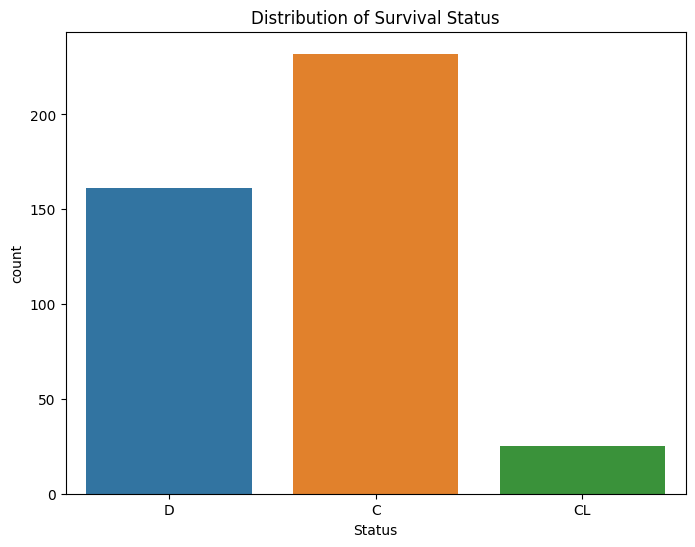

In [ ]:
# Explore the distribution of the target variable (Status)
plt.figure(figsize=(8, 6))
sns.countplot(x="Status", data=data)
plt.title("Distribution of Survival Status")
plt.show()

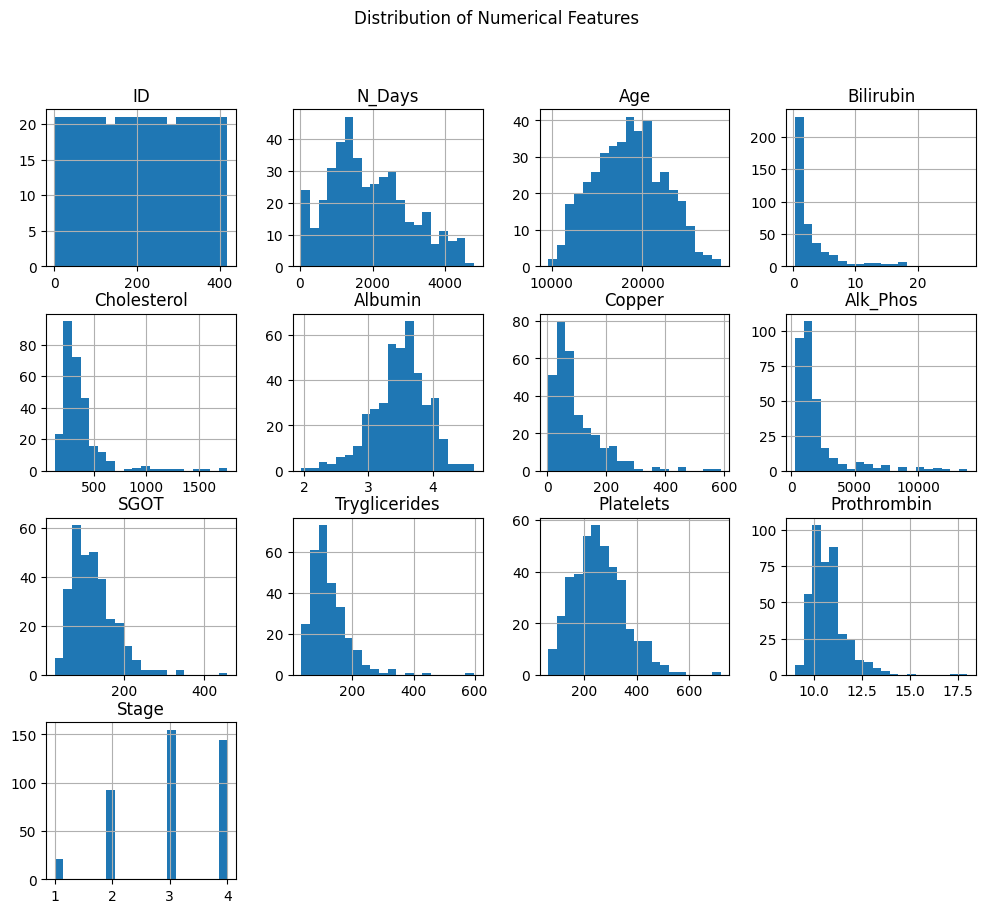

In [ ]:
# Explore the distribution of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

<ipython-input-13-8ba1ad6ee2b0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


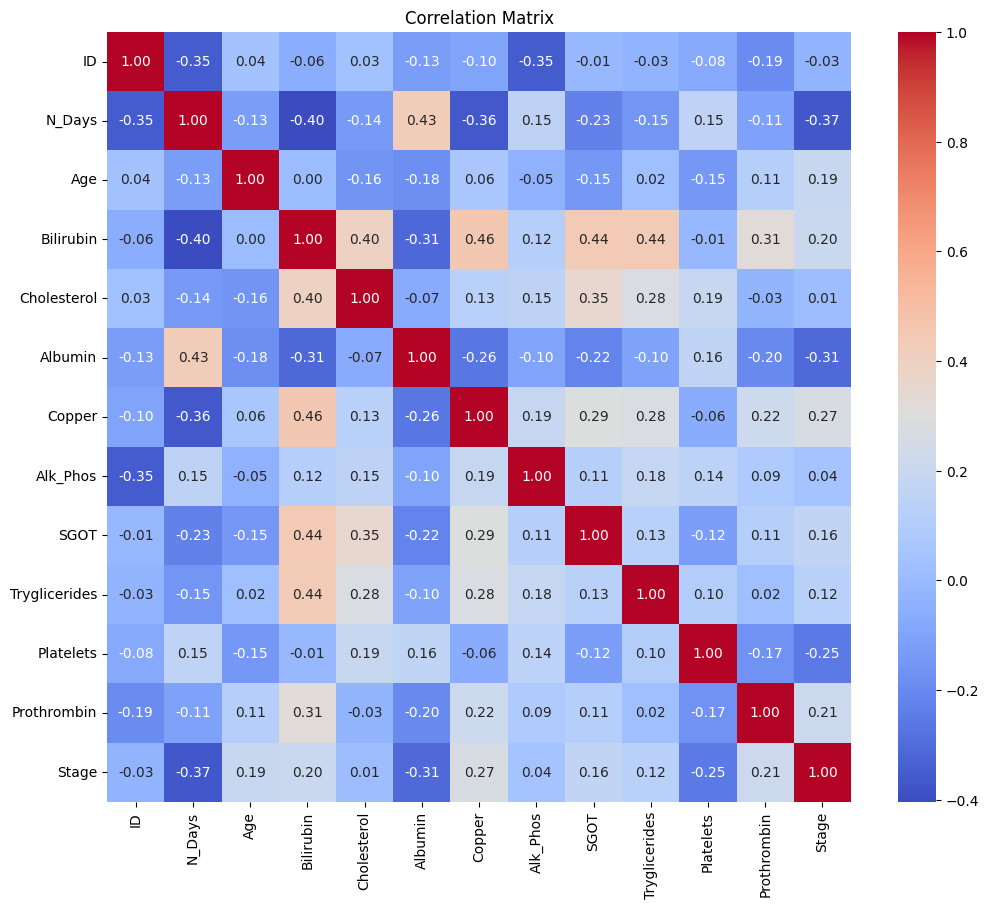

In [ ]:
# Explore correlations between features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

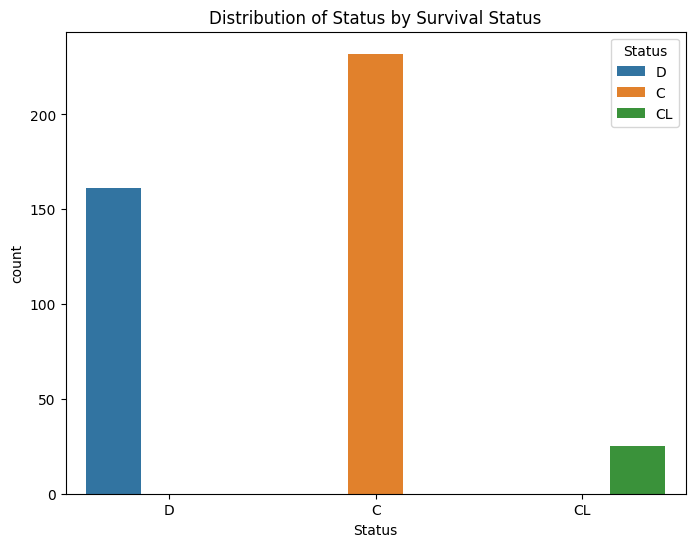

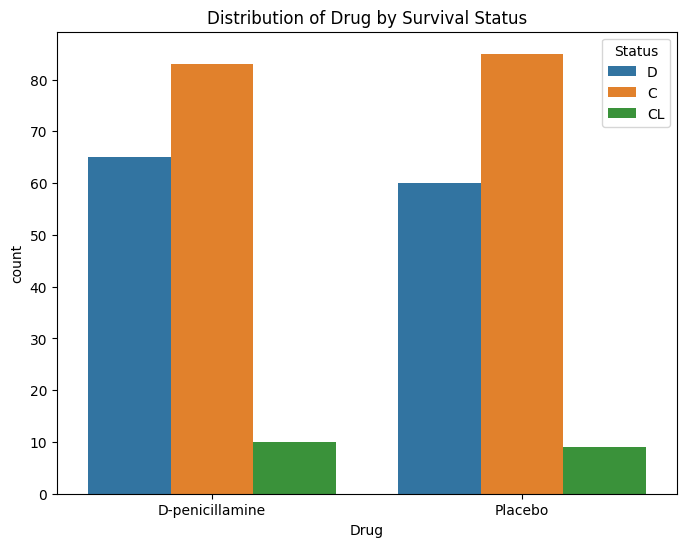

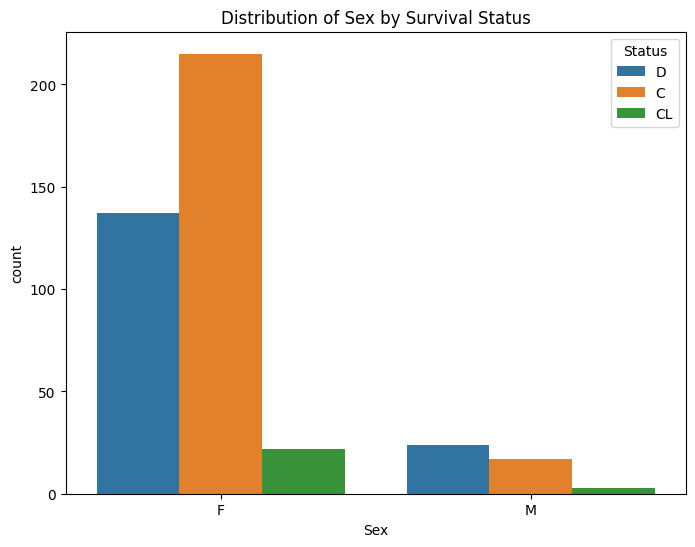

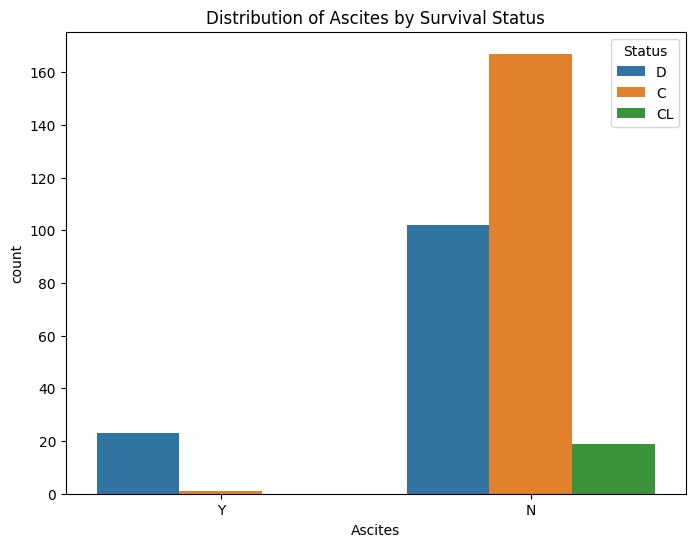

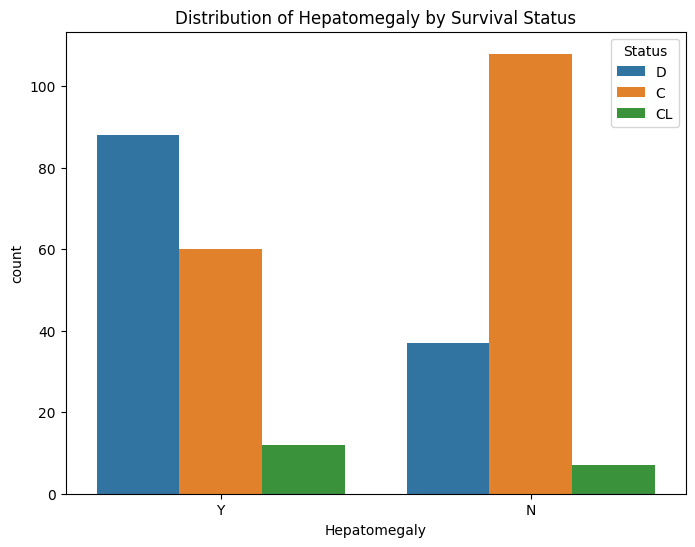

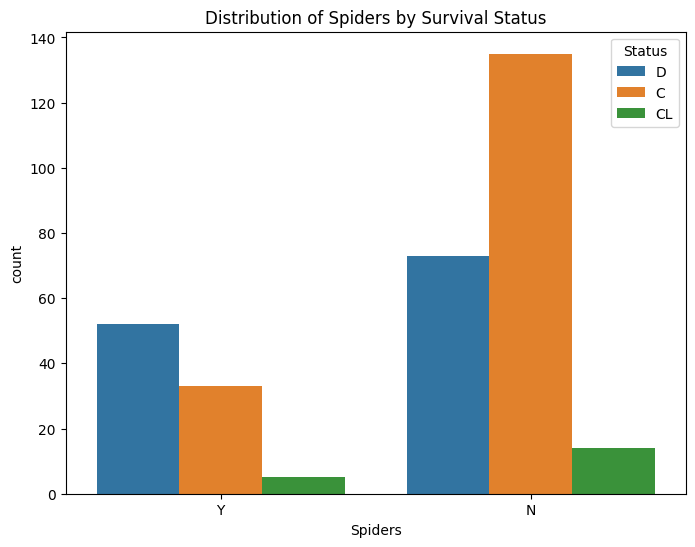

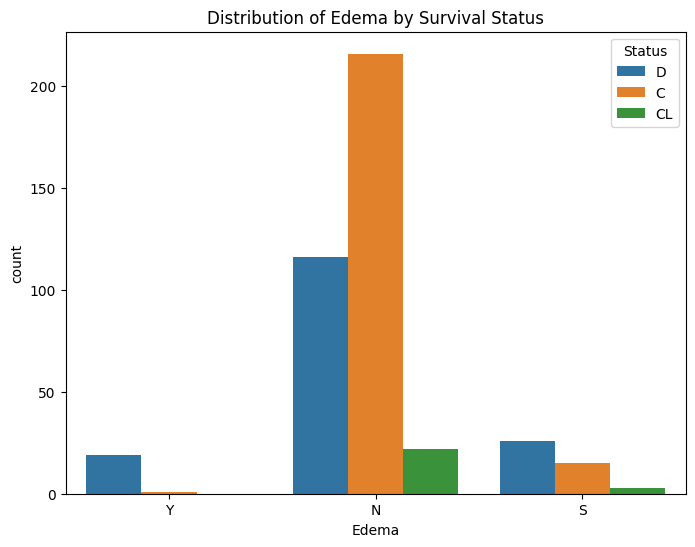

In [ ]:
# Explore the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue="Status", data=data)
    plt.title(f"Distribution of {feature} by Survival Status")
    plt.show()

# Определить метрики для оценки эффективности модели

In [ ]:
file_path = "/content/gdrive/MyDrive/Datasets/cirrhosis.csv"
data = pd.read_csv(file_path)

In [ ]:
print(data['Status'])
data['Status'] = data['Status'].map({'D': 0, 'C': 1, 'CL': 2})

print(data['Status'])

0       D
1       C
2       D
3       D
4      CL
       ..
413     D
414     C
415     C
416     C
417     C
Name: Status, Length: 418, dtype: object
0      0
1      1
2      0
3      0
4      2
      ..
413    0
414    1
415    1
416    1
417    1
Name: Status, Length: 418, dtype: int64


In [ ]:
# Import necessary libraries
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer



# Handle the 'N_Days' column
data['N_Days'] = pd.to_numeric(data['N_Days'], errors='coerce')  # Convert to numeric, handle non-numeric values as NaN

# Selecting features based on the variable descriptions
features = ['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Selecting only categorical features for one-hot encoding
categorical_features = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features],
                                                    data['Status'],  # Use 'Status' as the target variable
                                                    test_size=0.2,
                                                    random_state=42)



# Impute missing values
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Impute numerical features with the mean
numerical_imputer = SimpleImputer(strategy='mean')
X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

# Impute categorical features with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = categorical_imputer.transform(X_test[categorical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Set feature names to strings
column_names = encoder.get_feature_names_out(categorical_features)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=column_names)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=column_names)

# Concatenate encoded features with the original features
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded], axis=1)

# Drop the original categorical features from X_train and X_test
X_train.drop(categorical_features, axis=1, inplace=True)
X_test.drop(categorical_features, axis=1, inplace=True)

# Baseline model (Logistic Regression)
baseline_model = LogisticRegression(max_iter=10000)  # Increase max_iter if needed
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)





/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
'''# Survival Analysis Metrics
kmf = KaplanMeierFitter()
kmf.fit(durations=X_test['N_Days'], event_observed=y_test)
c_index = concordance_index(y_test, -baseline_model.predict_proba(X_test)[:, 1], X_test['N_Days'])
auc = roc_auc_score(y_test, y_pred_baseline)
'''
# Classification Metrics
accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline,average='weighted')
recall = recall_score(y_test, y_pred_baseline,average='weighted')
f1 = f1_score(y_test, y_pred_baseline,average='weighted')
class_report = classification_report(y_test, y_pred_baseline)
# Display the metrics
#print(f"Concordance Index (C-index): {c_index}")
#print(f"Area Under the ROC Curve (AUC): {auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"""Classification Report:
          {class_report}""")


Concordance Index (C-index): 0.15756302521008403
Accuracy: 0.7738095238095238
Precision: 0.7370055573716902
Recall: 0.7738095238095238
F1 Score: 0.754954954954955
Classification Report:
                        precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.78      0.82      0.80        44
           2       0.00      0.00      0.00         4

    accuracy                           0.77        84
   macro avg       0.52      0.54      0.53        84
weighted avg       0.74      0.77      0.75        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13